# Kendal correlation between levels

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Misc functions

In [2]:
def select_max_k(df):
    df.groupby(['node','s'], sort=False)['k'].max()
    idx = df.groupby(['node','s'])['k'].transform(max) == df['k']
    df_k_max = df[idx][['node','number_influenced','s']]
    return df_k_max

def generate_pivot_df(df_k_max):
    pivot_df = []

    for n in df_k_max['node'].unique():
        df_nodes = df_k_max.loc[df_k_max['node'] == n]
        df_nodes = df_nodes.set_index('node', drop=True)
        pivot_df.append(df_nodes.pivot_table(values='number_influenced',
                                             index=df_nodes.index,
                                             columns='s').reset_index(drop=True))
    df_to_corr = pd.concat(pivot_df)
    
    return df_to_corr

## Plurality

In [3]:
df = pd.read_csv('parallel_merge_plurality.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,0,24587,26,2
3,1,24587,41,2
4,2,24587,42,2


In [4]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,24587,1,0
1,24587,2,1
4,24587,42,2
7,24587,206,3
15,24587,1054,4


In [5]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,2,42,206,1054,2596,3632,4015,4116,4152,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN,NaN
0,4,17,72,355,1515,3016,3772,4066,4142,4156,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,9,33,290,1306,2943,3783,4061,4128,4152,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,11,35,130,731,2136,3412,3970,4114,4145.0,4156.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,2,11,32,64,221,957,2506,3560,3948,4079,4132.0,4156.0,4158.0,4158.0,NaN,NaN,NaN,NaN


In [6]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.184046,0.126698,0.124208,0.125315,0.127051,0.127378,0.129272,0.130251,0.130093,0.113580,0.042487,-0.005362,-0.059455,-0.065416,0.049306,0.074484,NaN
1,0.184046,1.000000,0.556603,0.445083,0.416144,0.413999,0.408679,0.408963,0.397588,0.378089,0.341872,0.254516,0.185097,0.087690,0.026824,0.236300,0.241656,NaN
2,0.126698,0.556603,1.000000,0.778107,0.719382,0.706976,0.703058,0.696259,0.671291,0.640029,0.593677,0.473384,0.347591,0.214673,0.083987,0.191242,0.278115,NaN
3,0.124208,0.445083,0.778107,1.000000,0.887703,0.859127,0.852662,0.840121,0.805026,0.756398,0.709100,0.584225,0.449283,0.354117,0.197575,0.273383,0.244542,NaN
4,0.125315,0.416144,0.719382,0.887703,1.000000,0.933085,0.920183,0.900645,0.858316,0.804996,0.745339,0.624748,0.496260,0.436204,0.445194,0.318682,0.238384,NaN
5,0.127051,0.413999,0.706976,0.859127,0.933085,1.000000,0.953418,0.929413,0.875631,0.823997,0.758191,0.635928,0.513725,0.453257,0.524562,0.424791,0.278115,NaN
6,0.127378,0.408679,0.703058,0.852662,0.920183,0.953418,1.000000,0.935453,0.881965,0.826292,0.762119,0.638645,0.519672,0.458390,0.531697,0.501302,0.279275,NaN
7,0.129272,0.408963,0.696259,0.840121,0.900645,0.929413,0.935453,1.000000,0.901709,0.835752,0.761067,0.638231,0.522075,0.462639,0.533690,0.519012,0.276970,NaN
8,0.130251,0.397588,0.671291,0.805026,0.858316,0.875631,0.881965,0.901709,1.000000,0.873077,0.775033,0.642021,0.521549,0.463532,0.534416,0.519012,0.276970,NaN


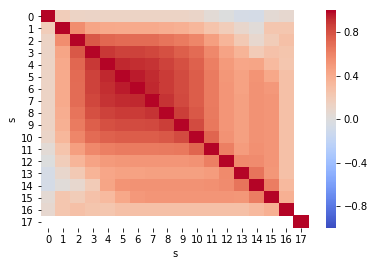

In [7]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Min

In [8]:
df = pd.read_csv('parallel_merge_min.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24589,1,0
1,1,24589,5,0
2,2,24589,23,0
3,3,24589,97,0
4,4,24589,451,0


In [9]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
11,24589,4158,0
22,24589,4158,1
32,24589,4158,2
41,24589,4158,3
49,24589,4158,4


In [10]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN,NaN
0,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158.0,4158.0,4158.0,4158.0,NaN,NaN,NaN,NaN
0,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158.0,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158.0,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158,4158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


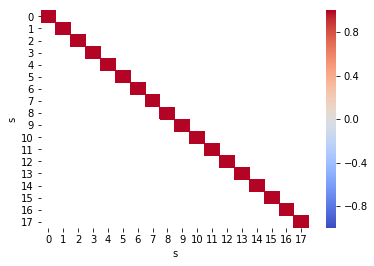

In [12]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Max

In [13]:
df = pd.read_csv('parallel_merge_max.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,0,24587,26,2
3,1,24587,40,2
4,0,24587,145,3


In [14]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,24587,1,0
1,24587,2,1
3,24587,40,2
5,24587,197,3
7,24587,913,4


In [15]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,2,40,197,913,2353,3570,4000,4116,4152,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,9,35,216,904,2227,3422,3941,4085,4132,4154.0,4158.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,1,2,23,85,286,956,2438,3575,3994,4121,4150.0,4156.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,1,3,17,83,400,1512,3096,3824,4048,4121,4150.0,4156.0,4158.0,NaN,NaN,NaN,NaN,NaN
0,1,3,11,49,216,1038,2530,3549,3988,4096,4145.0,4156.0,4158.0,4158.0,NaN,NaN,NaN,NaN


In [16]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.195033,0.129768,0.124484,0.125589,0.126918,0.127170,0.128802,0.130239,0.130031,0.113590,0.042487,-0.005362,-0.059455,-0.065416,0.049306,0.074484,NaN
1,0.195033,1.000000,0.565683,0.450307,0.420896,0.417677,0.414307,0.411750,0.402433,0.383866,0.349084,0.258274,0.179342,0.087661,0.033469,0.226017,0.243306,NaN
2,0.129768,0.565683,1.000000,0.787004,0.726165,0.711320,0.708006,0.701414,0.675056,0.645238,0.598468,0.479529,0.346833,0.211876,0.089927,0.192024,0.282843,NaN
3,0.124484,0.450307,0.787004,1.000000,0.897198,0.863045,0.854715,0.844582,0.806382,0.758295,0.711775,0.586835,0.453261,0.356373,0.198905,0.309623,0.251202,NaN
4,0.125589,0.420896,0.726165,0.897198,1.000000,0.940009,0.921111,0.905393,0.860542,0.804100,0.746273,0.626294,0.497612,0.438498,0.443440,0.318682,0.238384,NaN
5,0.126918,0.417677,0.711320,0.863045,0.940009,1.000000,0.959816,0.933996,0.879730,0.822506,0.755934,0.635363,0.514432,0.453412,0.525011,0.423755,0.278115,NaN
6,0.127170,0.414307,0.708006,0.854715,0.921111,0.959816,1.000000,0.944826,0.886195,0.826617,0.760527,0.636468,0.519355,0.459084,0.532736,0.502400,0.279275,NaN
7,0.128802,0.411750,0.701414,0.844582,0.905393,0.933996,0.944826,1.000000,0.904760,0.834786,0.762680,0.638636,0.521057,0.462588,0.533444,0.519012,0.276970,NaN
8,0.130239,0.402433,0.675056,0.806382,0.860542,0.879730,0.886195,0.904760,1.000000,0.872613,0.773170,0.642258,0.521906,0.463120,0.536403,0.519012,0.276970,NaN


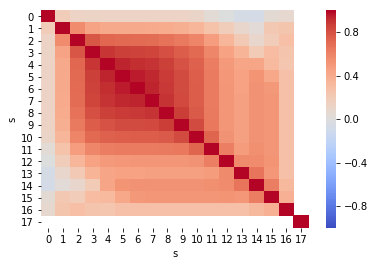

In [17]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Random

In [19]:
df = pd.read_csv('parallel_merge_random_2_arxiv.csv',
                 names=['k','node','number_influenced','s'])
df.head()

FileNotFoundError: File b'parallel_merge_random_2_arxiv.csv' does not exist

In [ ]:
df_k_max = select_max_k(df)
df_k_max.head()

In [ ]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

In [ ]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

In [ ]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')